# 思路
+ 拿到历史数据
+ 对历史数据进行测试
    + 测试以每天的开盘价为起点，以结束持有那一日的收盘价为终点
    + 测试不同持有时间的获利概率
        + 比如自买入后的1、2、3、5、8、30、64、128、265等等天的获胜概率
        + 以总盈利除以总入场次数，得到获胜概率（或许还能再分析收益）
        + 这就可以画出 胜负-持有天数 的图
        + 还可以画出 盈利/损失-持有天数的图


In [92]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/BTC-USD.csv')
# print(df)

#以前一天数据填补缺失值
df_filled = df.ffill()

print(df_filled.iloc[0])

Date         2014-09-17
Open         465.864014
High         468.174011
Low          452.421997
Close        457.334015
Adj Close    457.334015
Volume       21056800.0
Name: 0, dtype: object


In [33]:
openPrice=df_filled['Open']
closePrice=df_filled['Close']

print("open price: \n" , openPrice)

open price: 
 0         465.864014
1         456.859985
2         424.102997
3         394.673004
4         408.084991
            ...     
3419    41815.625000
3420    42126.125000
3421    42030.914063
3422    42030.914063
3423    42946.250000
Name: Open, Length: 3424, dtype: float64


In [65]:
dayInterval=[1,2,3,5,10,20,30,50,70,100,200,300,400,500]

num_rows, num_columns = df_filled.shape
print(num_rows,num_columns)

#对于每个时间间隔，都遍历整张表
#从第一天开始，假设间隔为8，则立刻取出第9天的收盘价
#计算相关数据

winorloss=[]
earnings=[]
returnrate=[]

for i in dayInterval:
    # print(i)
    earning=[]
    worl=[]
    retate=[]
    for j in range(num_rows):
        # print(j)
        buy_price=openPrice[j]
        #超出结束日期时不计算
        #或者以最后一行数据的收盘价计算？
        if(i+j>=num_rows):
            sell_price=closePrice.iloc[-1]
        else:
            sell_price=closePrice[i+j]
        # print(buy_price)
        # print(sell_price)
        gap=sell_price-buy_price
        
        earning.append(gap)
        worl.append(1 if gap>=0 else 0)
        retate.append(gap/buy_price)
    
    winorloss.append(worl)
    earnings.append(earning)
    returnrate.append(retate)

print(np.array(winorloss).shape)
print(np.array(earnings).shape)
print(np.array(returnrate).shape)

3424 7
(14, 3424)
(14, 3424)
(14, 3424)


In [66]:


count_1=np.array([np.count_nonzero(element==1 ) for element in np.array(winorloss)])
count_0=np.array([np.count_nonzero(element==0) for element in np.array(winorloss)])
print(count_0.shape)
print(count_1.shape)



(14,)
(14,)


In [67]:
count_0=np.array(count_0)
count_1=np.array(count_1)

winrate=count_1/(count_0+count_1)

print(winrate)




[0.54439252 0.54672897 0.54497664 0.54906542 0.56337617 0.56804907
 0.57593458 0.59082944 0.58382009 0.60543224 0.6901285  0.72283879
 0.78183411 0.77336449]


[0.54439252 0.54672897 0.54497664 0.54906542 0.56337617 0.56804907
 0.57593458 0.59082944 0.58382009 0.60543224 0.6901285  0.72283879
 0.78183411 0.77336449]


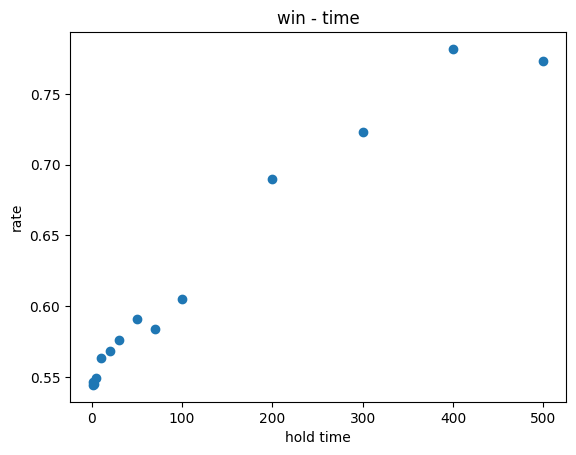

In [90]:
import matplotlib.pyplot as plt

print(winrate)
x=np.array(dayInterval)
y=winrate

plt.scatter(x,y)
plt.title('win - time')
plt.xlabel('hold time')
plt.ylabel('rate')
plt.show()

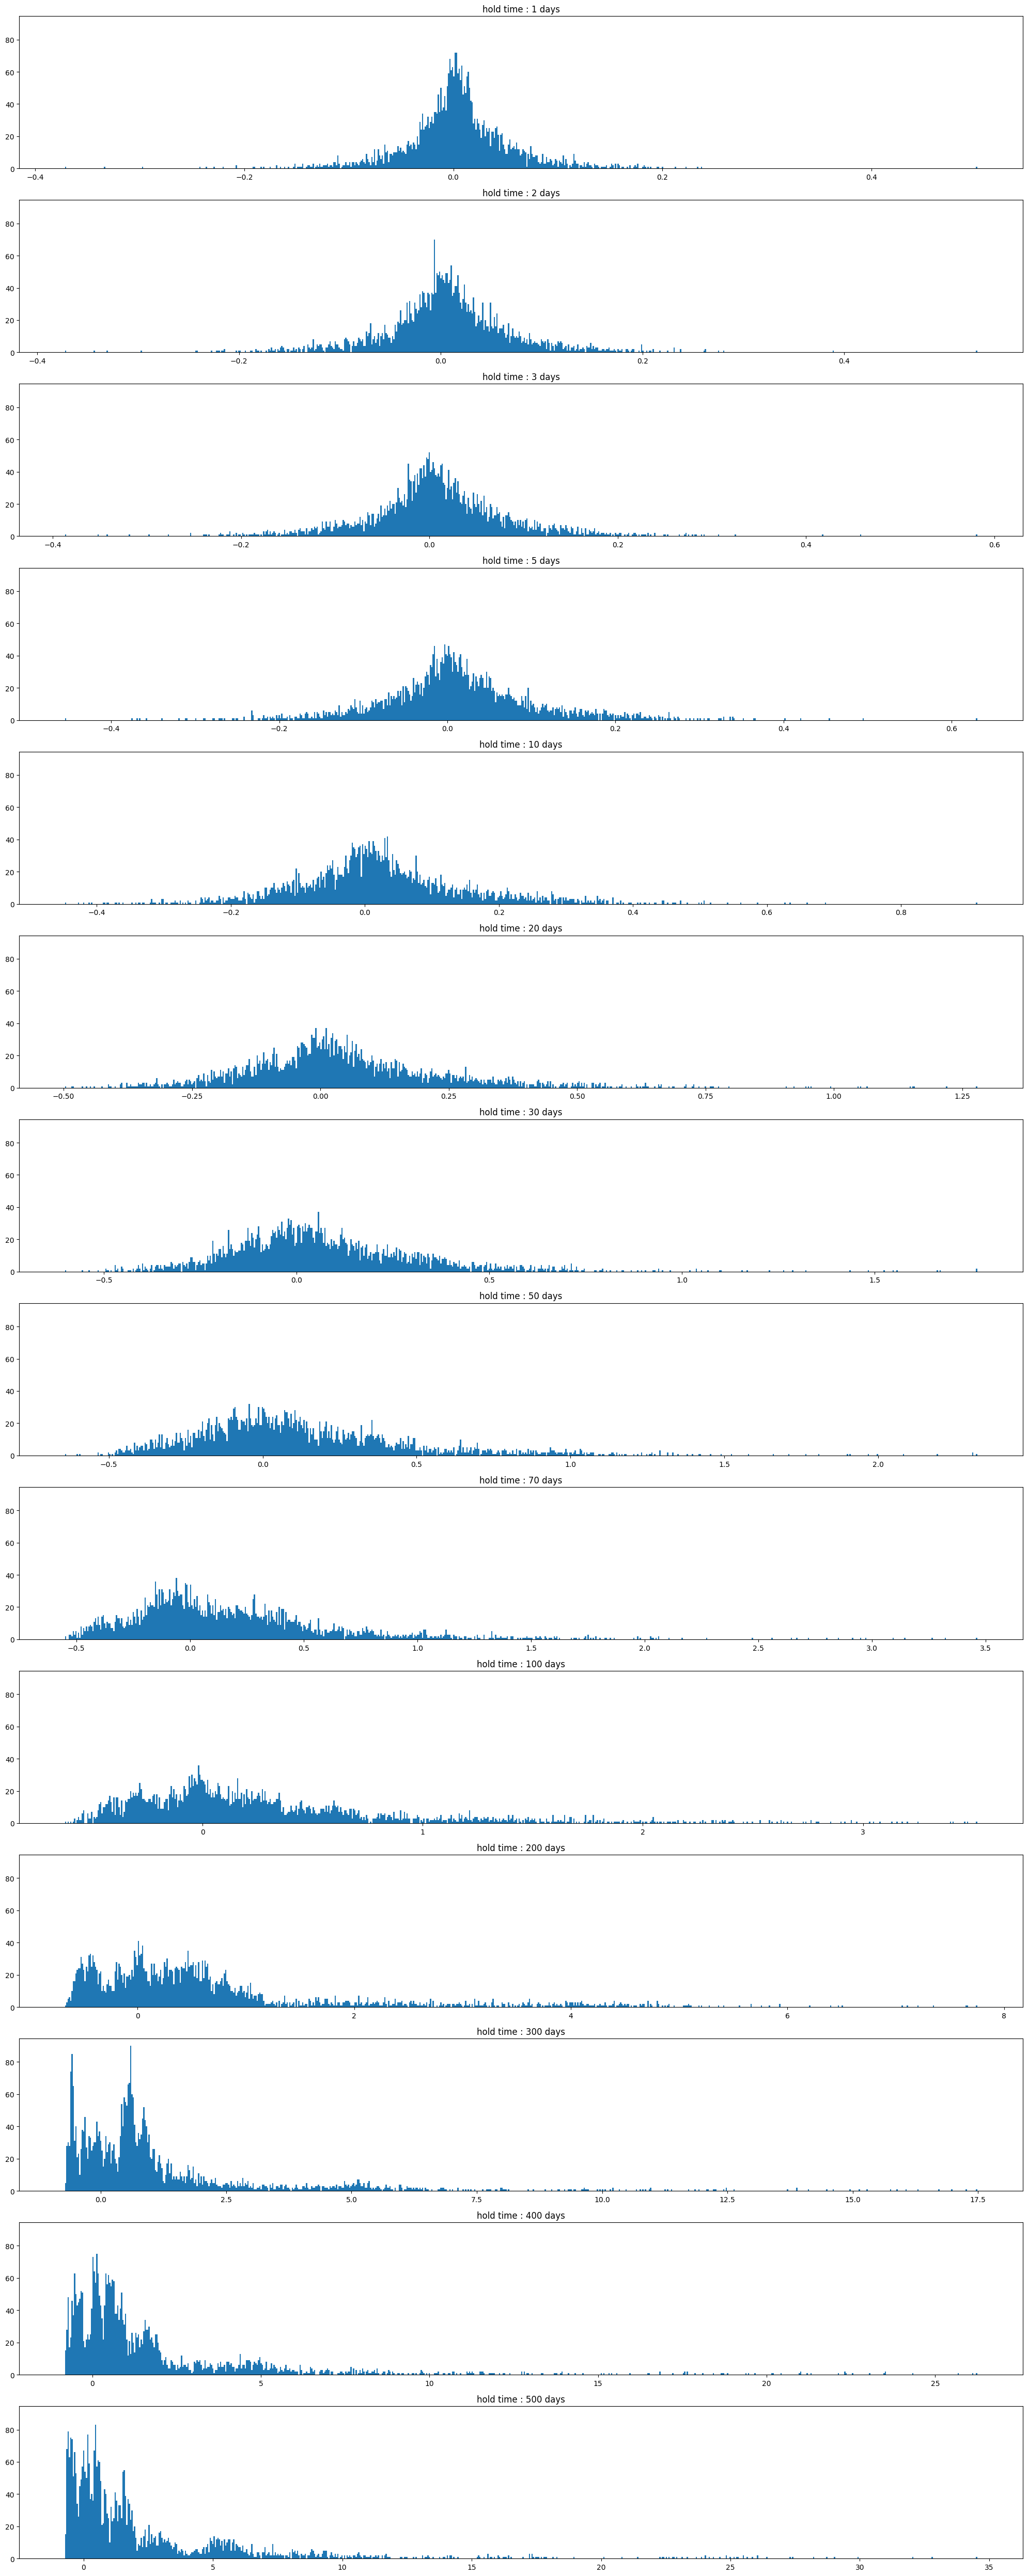

In [87]:
# 计算不同的回报率都有多少天，应该是正态分布吧
#x轴是回报率，y轴是具体的数额

fig, axs = plt.subplots(14,1 , sharey=True, tight_layout=False, figsize=(20, 50))

count=0
for i in range(14):
    for j in range(1):
        axs[i].hist(returnrate[i],bins=700)
        axs[i].set_title("hold time : "+ str(dayInterval[count])+ " days")
        count+=1

plt.tight_layout()
plt.show()


In [91]:
for i in range(14):
    count_positive = np.sum(np.array(returnrate[i]) >= 0)
    count_negative = np.sum(np.array(returnrate[i]) < 0)
    ave=np.average(returnrate[i])
    print(f"holdtime:{dayInterval[i]},count_positive: {count_positive},count_negative: {count_negative},ave: {ave}")

holdtime:1,count_positive: 1864,count_negative: 1560,ave: 0.00394052130729737
holdtime:2,count_positive: 1872,count_negative: 1552,ave: 0.005973475382788181
holdtime:3,count_positive: 1866,count_negative: 1558,ave: 0.008049991671830934
holdtime:5,count_positive: 1880,count_negative: 1544,ave: 0.012241298467989763
holdtime:10,count_positive: 1929,count_negative: 1495,ave: 0.022953402586112052
holdtime:20,count_positive: 1945,count_negative: 1479,ave: 0.046009326980867016
holdtime:30,count_positive: 1972,count_negative: 1452,ave: 0.06995928536104629
holdtime:50,count_positive: 2023,count_negative: 1401,ave: 0.12163186503011833
holdtime:70,count_positive: 1999,count_negative: 1425,ave: 0.1779782752639655
holdtime:100,count_positive: 2073,count_negative: 1351,ave: 0.2727343268858442
holdtime:200,count_positive: 2363,count_negative: 1061,ave: 0.6577232508598395
holdtime:300,count_positive: 2475,count_negative: 949,ave: 1.1807781436564828
holdtime:400,count_positive: 2677,count_negative: 747